In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import streamlit as st

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('vehicles_us.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
#separate the make and model strings into new columns
df[['make','model']] = df['model'].str.split(" ", n=1, expand=True)

In [5]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,make
0,9400,2011.0,x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler


In [6]:
#drop the date_posted column as it is unnecessary
df = df.drop(df.columns[11], axis=1)

In [7]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,days_listed,make
0,9400,2011.0,x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,19,bmw
1,25500,NaN,f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,50,ford
2,5500,2013.0,sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,79,hyundai
3,1500,2003.0,f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,9,ford
4,14900,2017.0,200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,28,chrysler


In [8]:
#create a variable that defines a list of manufacturer names
make_options = df['make'].unique()

In [9]:
df['model_year'].min()

1908.0

In [ ]:
df['model_year'].max()

Let's take a look at how many rows actually have data on vehicles older than 1950

In [10]:
older_than_1950 = (df['model_year'] < 1950).value_counts()
older_than_1950

model_year
False    51519
True         6
Name: count, dtype: int64

With only six rows containing cars older than 1950, it would be safe to narrow the range and drop those values

In [11]:
#dropping rows where the model_year is older than 1950
# Identifying the index of rows where model_year is older than 1950
index_to_drop = df[df['model_year'] < 1950].index
# Dropping these rows
df.drop(index_to_drop, axis='rows', inplace=True)

2019.0

creating the variable ranges for the slider within streamlit, which is not working here to demo. 

In [12]:
min_year, max_year = int(df['model_year'].min()), int(df['model_year'].max())

In [13]:
df['age'] = 2019 - df['model_year']
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,days_listed,make,age
31743,4500,2012.0,altima,excellent,4.0,gas,76000.0,automatic,coupe,blue,NaN,45,nissan,7.0
45004,17500,2016.0,accord,like new,4.0,gas,74352.0,automatic,sedan,silver,NaN,28,honda,3.0
44380,14000,2014.0,corolla,excellent,4.0,gas,36000.0,manual,sedan,black,NaN,15,toyota,5.0
17887,7500,2012.0,camry le,like new,4.0,gas,102000.0,automatic,sedan,black,NaN,61,toyota,7.0
15046,8900,2011.0,cr-v,excellent,4.0,gas,117000.0,automatic,SUV,brown,1.0,29,honda,8.0


In [14]:
def age_category(x):
    if x<5: return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'

In [15]:
df['age_category'] = df['age'].apply(age_category)

In [16]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,days_listed,make,age,age_category
0,9400,2011.0,x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,19,bmw,8.0,5-10
1,25500,NaN,f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,50,ford,NaN,>20
2,5500,2013.0,sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,79,hyundai,6.0,5-10
3,1500,2003.0,f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,9,ford,16.0,10-20
4,14900,2017.0,200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,28,chrysler,2.0,<5


### Price Analysis

In [27]:
#determine the average price by vehicle type
avg_price_type = df.groupby('type')['price'].mean().reset_index() 

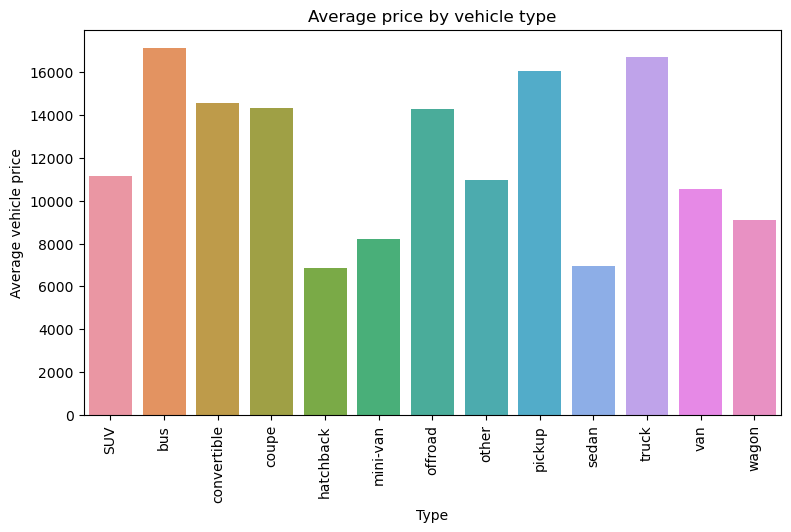

In [30]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=avg_price_type, x="type", y="price")
ax.set_xlabel('Type')
ax.set_ylabel('Average vehicle price')
ax.set_title('Average price by vehicle type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#determine the average price by vehicle type, make, FAILED

st.header('How does the vehicle type and make affect the average list price?')

avg_price_type = df.groupby('type')['price'].mean().reset_index()
avg_price_make = df.groupby('make')['price'].mean().reset_index() 

data_for_barplot = {
    "type": avg_price_type, 
    "make": avg_price_make
}

list_for_barplot = ['type', 'make']

selected_variable3 = st.selectbox('Vehicle Characteristic', list_for_barplot)

fig4 = px.bar(data_for_barplot[selected_variable3], x="price", color=selected_variable3)
fig4.update_layout(title= "<b> Visual of average price by {}</b>".format(selected_variable3))

st.plotly_chart(fig4)